# Partie 1: Exploration et Préparation des Données

# 1.1 Importation et Analyse Initiale

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Charger le dataset 
df = pd.read_csv("train.csv")
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [3]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [4]:
# faire une copie de la dataset
backup = df.copy()

In [5]:
# examiner la structure :
print("le nombre de lignes et des colonnes : ")
df.shape

le nombre de lignes et des colonnes : 


(209673, 8)

In [6]:
#Identifier les variables clés
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


1-trip_duration : Durée du trajet

Temps total de la course (probablement en minutes ou secondes)
2-distance_traveled : Distance parcourue

Distance totale du trajet (probablement en kilomètres ou miles)
3-num_of_passengers : Nombre de passagers

Combien de personnes ont pris le taxi pour cette course
4-fare : Tarif de base

Le prix de base de la course (sans pourboire ni frais supplémentaires)
5-tip : Pourboire

Le montant du pourboire laissé par le client
6-miscellaneous_fees : Frais divers

Frais supplémentaires (péages, frais d'aéroport, etc.)
7-total_fare : Tarif total

Le montant total payé = fare + tip + miscellaneous_fees
8-surge_applied : Tarification dynamique appliquée

Indique si un supplément pour forte demande a été appliqué (1 = oui, 0 = non)
Aussi appelé "prix de pointe" ou "surge pricing"

In [7]:
# Analyser les types de variables (numériques, catégorielles, temporelles)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [8]:
# Convertir num_of_passengers en entier
df['num_of_passengers'] = df['num_of_passengers'].astype(int)

In [9]:
df["surge_applied"].unique()

array([0, 1], dtype=int64)

In [10]:
# Vérifier les valeurs aberrantes et manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

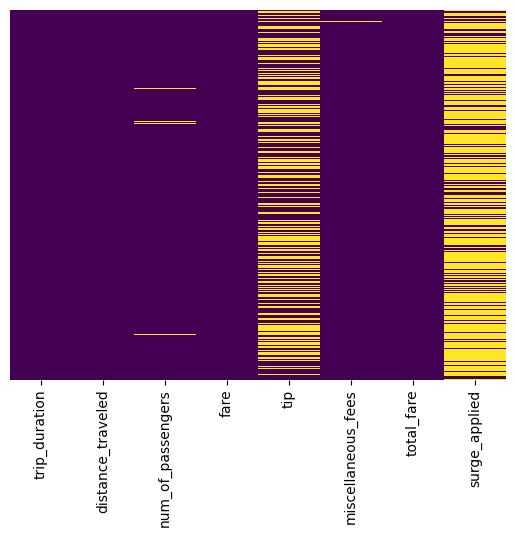

In [11]:
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

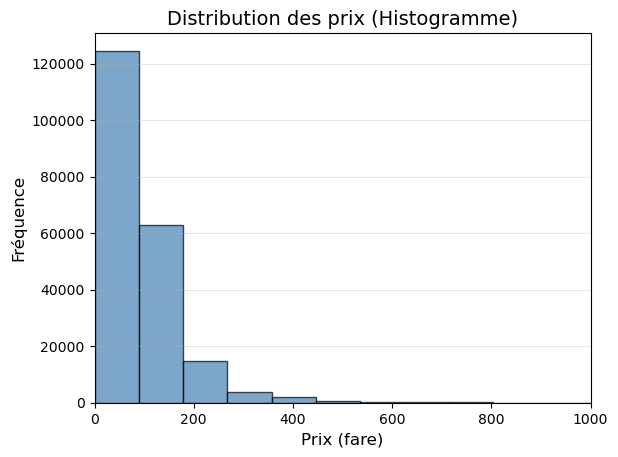

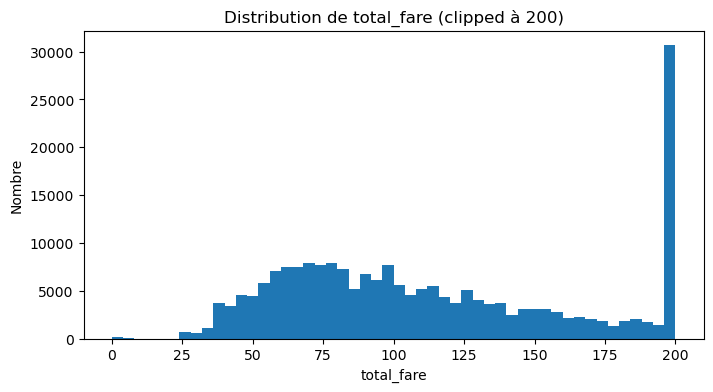

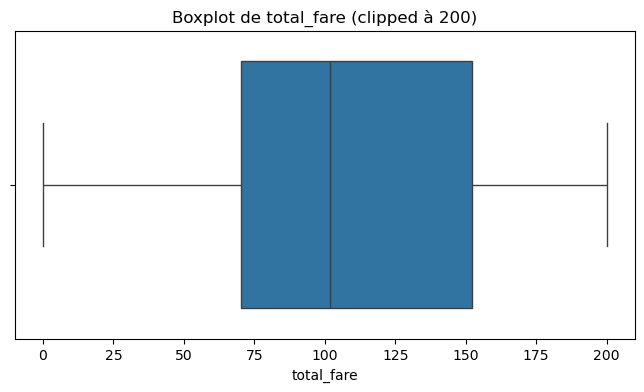

Statistiques descriptives des prix:
count    209673.000000
mean         99.623431
std          85.602702
min           0.000000
25%          52.500000
50%          75.000000
75%         116.250000
max        4466.250000
Name: fare, dtype: float64

Étendue: 4466.25
Variance: 7327.82


In [12]:
# Étudier la distribution des prix (histogramme, boxplot)

# Histogramme
plt.hist(df['fare'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution des prix (Histogramme)', fontsize=14)
plt.xlabel('Prix (fare)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xlim(0, 1000)  # Limiter l'axe des x de 0 à 1000
plt.grid(axis='y', alpha=0.3)


plt.figure(figsize=(8,4))
plt.hist(df['total_fare'].clip(0,200), bins=50)
plt.title('Distribution de total_fare (clipped à 200)')
plt.xlabel('total_fare'); plt.ylabel('Nombre')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['total_fare'].clip(0,200))
plt.title('Boxplot de total_fare (clipped à 200)')
plt.show()

# Statistiques descriptives
print("Statistiques descriptives des prix:")
print(df['fare'].describe())
print(f"\nÉtendue: {df['fare'].max() - df['fare'].min():.2f}")
print(f"Variance: {df['fare'].var():.2f}")

In [13]:
# Convertir trip_duration de secondes en minutes
df['trip_duration'] = (df['trip_duration'] / 60).round(2)

In [14]:
print("min: ",df['trip_duration'].min(),"min \n")
print("max: ",df['trip_duration'].max(),"min \n")
print("moyenne: ",df['trip_duration'].mean().round(2),"min ")

min:  0.0 min 

max:  1439.78 min 

moyenne:  19.55 min 


In [15]:
# Analyser et supprimer les outliers de trip_duration
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 2)  # Minimum de 2 minutes

print(f"Q1: {Q1:.2f} minutes")
print(f"Q3: {Q3:.2f} minutes")
print(f"IQR: {IQR:.2f} minutes")
print(f"Limite supérieure: {upper_bound:.2f} minutes")
print(f"Limite inférieure: {lower_bound:.2f} minutes")

# Nombre d'outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['trip_duration'].min():.2f} min")
print(f"Max: {df['trip_duration'].max():.2f} min")
print(f"Mean: {df['trip_duration'].mean():.2f} min")
print(f"Median: {df['trip_duration'].median():.2f} min")

Q1: 7.43 minutes
Q3: 18.30 minutes
IQR: 10.87 minutes
Limite supérieure: 34.61 minutes
Limite inférieure: 2.00 minutes

Outliers détectés: 16334 (7.79%)
Avant: 209673 lignes
Après: 193339 lignes

Nouvelles stats:
Min: 2.00 min
Max: 34.60 min
Mean: 12.93 min
Median: 11.45 min


In [16]:
print("min: ",df['distance_traveled'].min(),"km\n")
print("max: ",df['distance_traveled'].max(),"km !!!\n")
print("moyenne: ",df['distance_traveled'].mean(),"km")

min:  0.02 km

max:  57283.91 km !!!

moyenne:  4.51531036159285 km


In [17]:
# Analyser et supprimer les outliers de distance_traveled
Q1 = df['distance_traveled'].quantile(0.25)
Q3 = df['distance_traveled'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 0.1)  # Minimum 0.1 km (100 mètres)

print(f"Q1: {Q1} km")
print(f"Q3: {Q3} km")
print(f"Limite supérieure: {upper_bound} km")
print(f"Limite inférieure: {lower_bound} km")

# Nombre d'outliers
outliers = df[(df['distance_traveled'] < lower_bound) | (df['distance_traveled'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['distance_traveled'] >= lower_bound) & (df['distance_traveled'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['distance_traveled'].min()} km")
print(f"Max: {df['distance_traveled'].max()} km")
print(f"Mean: {df['distance_traveled'].mean():.2f} km")

Q1: 1.95 km
Q3: 5.2 km
Limite supérieure: 10.075 km
Limite inférieure: 0.1 km

Outliers détectés: 14277 (7.38%)
Avant: 193339 lignes
Après: 179062 lignes

Nouvelles stats:
Min: 0.1 km
Max: 10.07 km
Mean: 3.47 km


In [18]:
# frais divers
df["miscellaneous_fees"][df['miscellaneous_fees']<0]

22479    -0.250
23194    -0.250
27452    -0.500
30167    -0.500
66388    -0.500
78548    -0.500
83042    -0.375
88830    -0.250
98606    -0.500
100716   -0.500
125277   -0.500
155539   -0.250
168516   -0.500
175321   -0.500
175546   -0.500
178085   -0.500
190615   -0.500
207354   -0.250
Name: miscellaneous_fees, dtype: float64

In [19]:
print("min: ",df['miscellaneous_fees'].min(),"$")
print("max: ",df['miscellaneous_fees'].max(),"$")
print("moyenne: ",df['miscellaneous_fees'].mean(),"$")

min:  -0.5 $
max:  159.75 $
moyenne:  13.960203728317566 $


In [20]:
# Analyser et supprimer les outliers de miscellaneous_fees
Q1 = df['miscellaneous_fees'].quantile(0.25)
Q3 = df['miscellaneous_fees'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de frais négatifs)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['miscellaneous_fees'] < lower_bound) | (df['miscellaneous_fees'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['miscellaneous_fees'] >= lower_bound) & (df['miscellaneous_fees'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['miscellaneous_fees'].min()} $")
print(f"Max: {df['miscellaneous_fees'].max()} $")
print(f"Mean: {df['miscellaneous_fees'].mean():.2f} $")
print(f"Median: {df['miscellaneous_fees'].median():.2f} $")

Q1: 6.0 $
Q3: 26.200000000000003 $
IQR: 20.200000000000003 $
Limite supérieure: 56.50000000000001 $
Limite inférieure: 0.0 $

Outliers détectés: 387 (0.22%)
Avant: 179062 lignes
Après: 178675 lignes

Nouvelles stats:
Min: 0.0 $
Max: 55.875 $
Mean: 13.85 $
Median: 9.75 $


In [21]:
print("min: ",df['total_fare'].min(),"$")
print("max: ",df['total_fare'].max(),"$")
print("moyenne: ",df['total_fare'].mean(),"$")

min:  0.0 $
max:  2582.85 $
moyenne:  103.62046844829999 $


In [22]:
# Analyser et supprimer les outliers de total_fare
Q1 = df['total_fare'].quantile(0.25)
Q3 = df['total_fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['total_fare'] < lower_bound) | (df['total_fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['total_fare'] >= lower_bound) & (df['total_fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['total_fare'].min()} $")
print(f"Max: {df['total_fare'].max()} $")
print(f"Mean: {df['total_fare'].mean():.2f} $")
print(f"Median: {df['total_fare'].median():.2f} $")

Q1: 69.75 $
Q3: 129.75 $
IQR: 60.0 $
Limite supérieure: 219.75 $
Limite inférieure: 3.0 $

Outliers détectés: 3180 (1.78%)
Avant: 178675 lignes
Après: 175495 lignes

Nouvelles stats:
Min: 3.0 $
Max: 219.75 $
Mean: 100.73 $
Median: 92.25 $


In [23]:
print("min: ",df['tip'].min(),"$")
print("max: ",df['tip'].max(),"$")
print("moyenne: ",df['tip'].mean(),"$")

min:  0 $
max:  188 $
moyenne:  10.46473118892276 $


In [24]:
# Analyser et supprimer les outliers de tip
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0, les pourboires peuvent être 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de pourboire négatif)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['tip'] < lower_bound) | (df['tip'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['tip'].min()} $")
print(f"Max: {df['tip'].max()} $")
print(f"Mean: {df['tip'].mean():.2f} $")
print(f"Median: {df['tip'].median():.2f} $")

Q1: 0.0 $
Q3: 18.0 $
IQR: 18.0 $
Limite supérieure: 45.0 $
Limite inférieure: 0.0 $

Outliers détectés: 679 (0.39%)
Avant: 175495 lignes
Après: 174816 lignes

Nouvelles stats:
Min: 0 $
Max: 45 $
Mean: 10.27 $
Median: 8.00 $


In [25]:
# supprimer les courses avec 0 passager ou plus que 3
df.drop(df[(df['num_of_passengers'] == 0) | (df['num_of_passengers'] > 4)].index, inplace=True)

In [26]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,12.47,2.75,1,75.00,24,6.300,105.300,0
1,19.78,3.43,1,105.00,24,13.200,142.200,0
2,12.17,3.12,1,71.25,0,26.625,97.875,1
3,11.18,5.63,3,90.00,0,9.750,99.750,0
4,5.48,2.09,1,45.00,12,13.200,70.200,0


In [27]:
# Vérifier la cohérence de total_fare
df['calculated_total'] = df['fare'] + df["tip"] + df['miscellaneous_fees']

# Comparer avec total_fare (avec une tolérance pour les erreurs d'arrondi)
df['difference'] = abs(df['total_fare'] - df['calculated_total'])

# Afficher les statistiques
print("Vérification de la cohérence de total_fare:")
print(f"Nombre de lignes avec différence > 0.01: {len(df[df['difference'] > 0.01])}")


# Afficher les lignes incohérentes
incoherent = df[df['difference'] > 0.01]
if len(incoherent) > 0:
    print(f"\n{len(incoherent)} lignes incohérentes trouvées:")
    print(incoherent[['fare', 'tip', 'miscellaneous_fees', 'total_fare', 'calculated_total', 'difference']].head(10))
else:
    print("\n✅ Toutes les lignes sont cohérentes!")

# Nettoyer les colonnes temporaires
df.drop(['calculated_total', 'difference'], axis=1, inplace=True)

Vérification de la cohérence de total_fare:
Nombre de lignes avec différence > 0.01: 0

✅ Toutes les lignes sont cohérentes!


1.2 Nettoyage et Feature Engineering

In [28]:
#Supprimer les courses avec des prix négatifs ou extrêmes

# Afficher le nombre de lignes après suppression
print(f"\nNombre de lignes après suppression: {len(df)}")

# Analyser et supprimer les outliers de fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")
print(f"Nombre de courses avec fare > 211.875$: {len(df[df['fare'] > 211.875])}")
print(f"Nombre de courses avec fare < 0$: {len(df[df['fare'] <= 0])}")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['fare'].min()} $")
print(f"Max: {df['fare'].max()} $")
print(f"Mean: {df['fare'].mean():.2f} $")
print(f"Median: {df['fare'].median():.2f} $")




Nombre de lignes après suppression: 167279
Q1: 52.5 $
Q3: 97.5 $
IQR: 45.0 $
Limite supérieure: 165.0 $
Limite inférieure: 3.0 $

Outliers détectés: 1132 (0.68%)
Avant: 167279 lignes
Après: 166147 lignes
Nombre de courses avec fare > 211.875$: 0
Nombre de courses avec fare < 0$: 0

Nouvelles stats:
Min: 15.0 $
Max: 165.0 $
Mean: 75.83 $
Median: 71.25 $


In [29]:
# gérer les valeurs manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

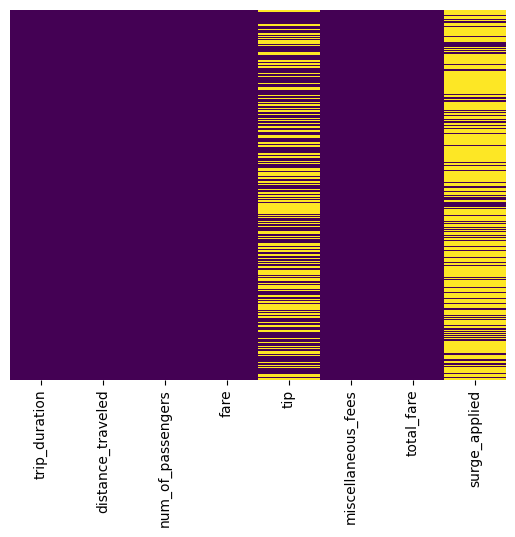

In [30]:
# dataset clean
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

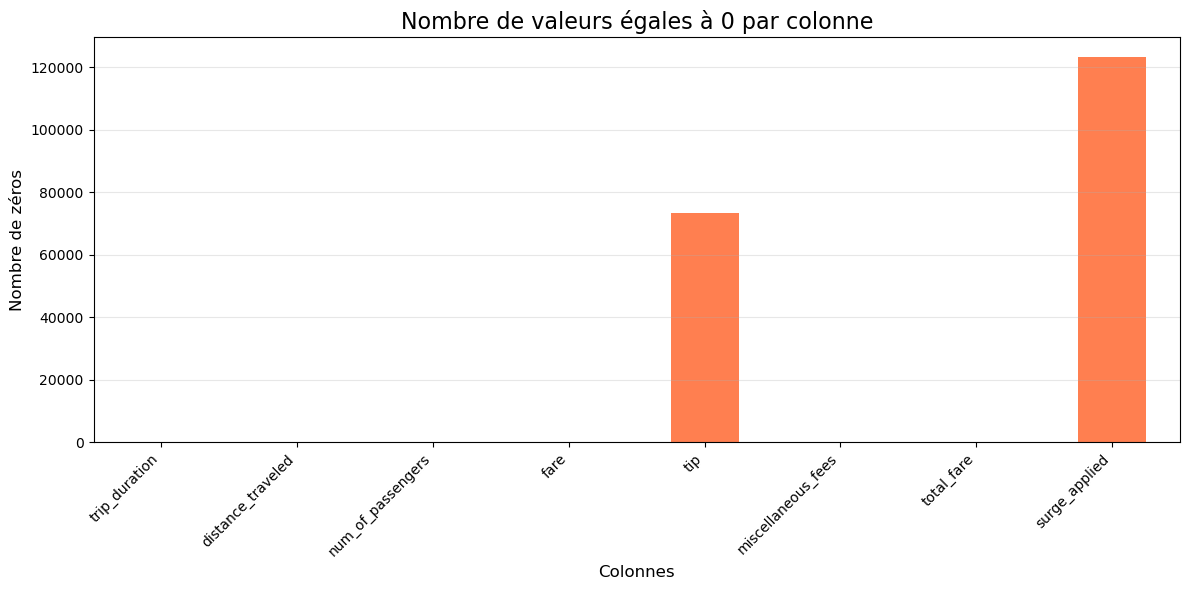


Pourcentage de zéros par colonne:
surge_applied         74.24
tip                   44.12
miscellaneous_fees     0.02
trip_duration          0.00
distance_traveled      0.00
num_of_passengers      0.00
fare                   0.00
total_fare             0.00
dtype: float64


In [31]:
# Compter et visualiser les zéros par colonne
zero_counts = (df == 0).sum()

plt.figure(figsize=(12, 6))
zero_counts.plot(kind='bar', color='coral')
plt.title('Nombre de valeurs égales à 0 par colonne', fontsize=16)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nombre de zéros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les pourcentages
print("\nPourcentage de zéros par colonne:")
print(((df == 0).sum() / len(df) * 100).round(2).sort_values(ascending=False))

In [32]:


# Séparer les features numériques et la cible
# On retire 'tip' car il fait partie de total_fare (éviter le data leakage)
features = ['trip_duration', 'distance_traveled', 'num_of_passengers']
df_sample=df.sample(n=20000, random_state=42)
X = df_sample[features]
y = df_sample['total_fare']

print("="*60)
print("AVANT STANDARDISATION:")
print("="*60)
print(X.describe().round(2))

# Standardiser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



AVANT STANDARDISATION:
       trip_duration  distance_traveled  num_of_passengers
count       20000.00           20000.00           20000.00
mean           11.69               3.33               1.12
std             6.03               1.97               0.40
min             2.00               0.10               1.00
25%             7.08               1.85               1.00
50%            10.63               2.82               1.00
75%            15.17               4.38               1.00
max            34.57              10.07               4.00


# Partie 2: Clustering Hiérarchique avec Scikit-Learn


## 2.1 Implémentation du Clustering Hiérarchique avec Scikit-Learn

In [36]:
# 3. Tester différents n_clusters avec ward et euclidean
results = {}

for n in [3, 4, 5]:
    # Créer le modèle
    model = AgglomerativeClustering(
        n_clusters=n,
        linkage='ward',
        metric='euclidean'
    )
    
    # Fit et prédire
    labels = model.fit_predict(X_scaled)
    
    # Stocker les résultats
    results[n] = labels
    df_sample[f'cluster_{n}'] = labels
    
    print(f"\n=== {n} Clusters ===")
    print(f"Distribution: {np.bincount(labels)}")
    print(f"\nStatistiques par cluster:")
    print(df_sample.groupby(f'cluster_{n}')[features + ['total_fare']].mean())






=== 3 Clusters ===
Distribution: [12341  5613  2046]

Statistiques par cluster:
           trip_duration  distance_traveled  num_of_passengers  total_fare
cluster_3                                                                 
0               8.585294           2.283502           1.000000   78.936950
1              18.429439           5.636879           1.000000  144.731908
2              11.949198           3.339448           2.210655   99.977676

=== 4 Clusters ===
Distribution: [2046 5613 7805 4536]

Statistiques par cluster:
           trip_duration  distance_traveled  num_of_passengers  total_fare
cluster_4                                                                 
0              11.949198           3.339448           2.210655   99.977676
1              18.429439           5.636879           1.000000  144.731908
2               6.608430           1.758163           1.000000   66.748242
3              11.986841           3.187443           1.000000   99.909805

=== 5 Clus

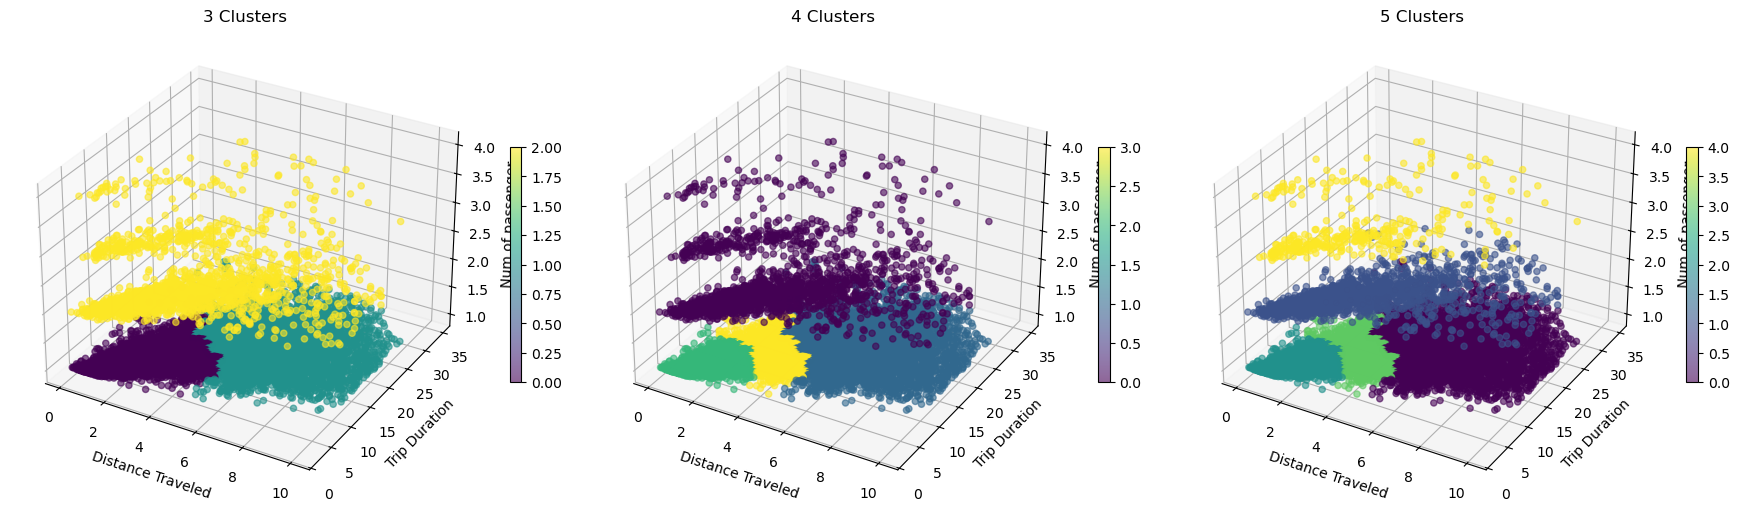

In [37]:



fig = plt.figure(figsize=(18, 5))

for idx, n in enumerate([3, 4, 5]):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    
    scatter = ax.scatter(
        df_sample['distance_traveled'], 
        df_sample['trip_duration'],
        df_sample['num_of_passengers'],
        c=df_sample[f'cluster_{n}'],
        cmap='viridis',
        alpha=0.6
    )
    
    ax.set_xlabel('Distance Traveled')
    ax.set_ylabel('Trip Duration')
    ax.set_zlabel('Num of passenger')
    ax.set_title(f'{n} Clusters')
    plt.colorbar(scatter, ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

À partir des visualisations des regroupements en 3, 4 et 5 clusters, le choix du meilleur nombre de clusters est 3.
Avec 3 clusters, les groupes sont plus nets, mieux séparés et représentent des catégories cohérentes selon les variables (distance parcourue, durée du trajet, surcharge appliquée).

Lorsque l’on passe à 4 ou 5 clusters, les regroupements deviennent moins stables, avec davantage de chevauchements et des sous-groupes peu significatifs. Cela indique que l’on complexifie le modèle sans réelle amélioration.

## 2.2 Visualisation du Dendrogramme avec Scipy


Calcul de la matrice de linkage...
Matrice de linkage calculée: shape = (19999, 4)


C:\Users\user\AppData\Local\Temp\ipykernel_18112\3012710010.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)
C:\Users\user\AppData\Local\Temp\ipykernel_18112\3012710010.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


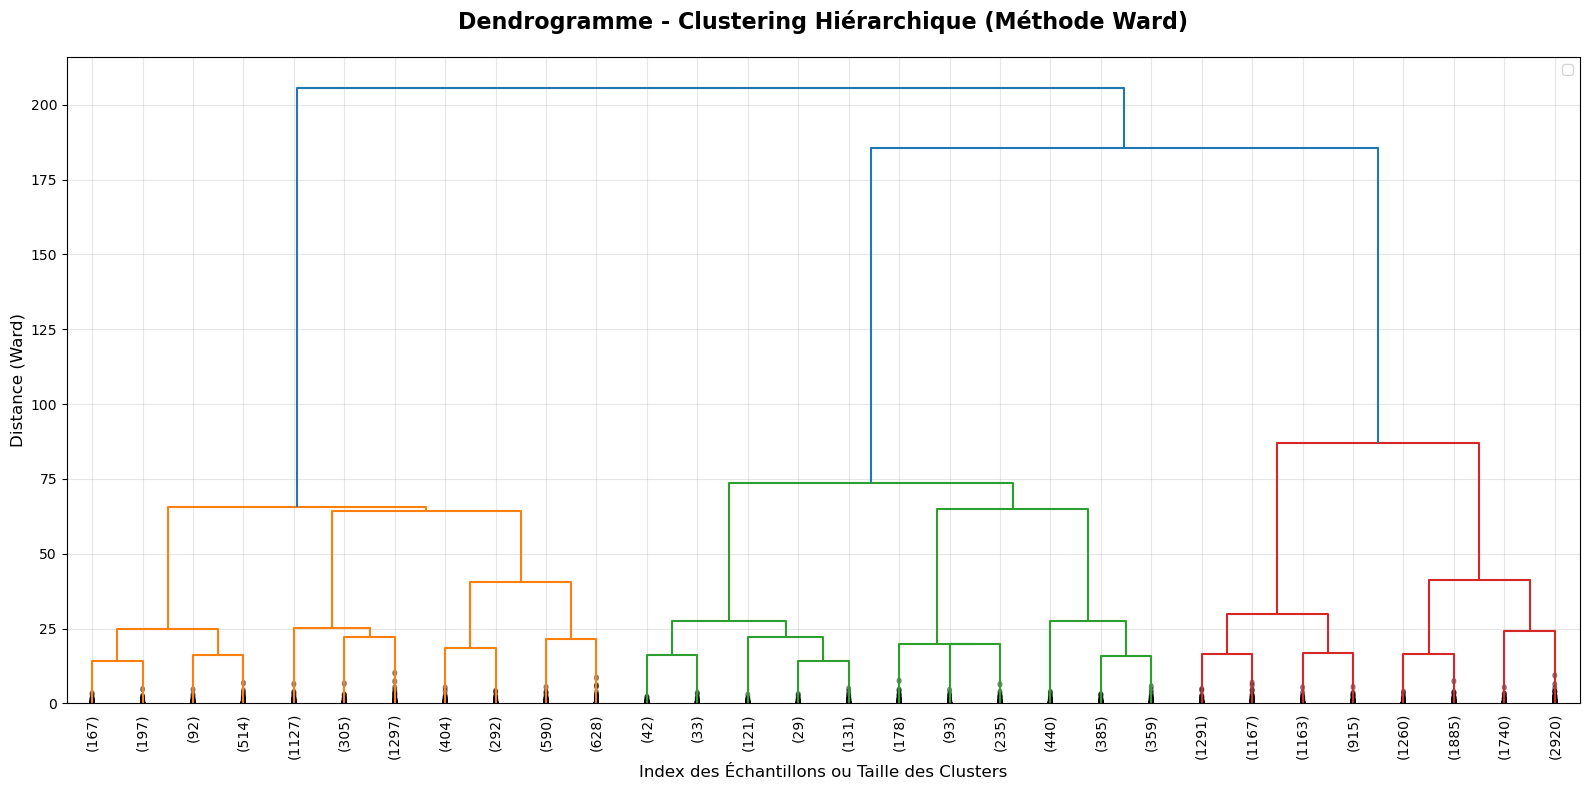

In [38]:
# Calculer la matrice de linkage avec méthode 'ward'
print("\nCalcul de la matrice de linkage...")
Z = linkage(X_scaled, method='ward')
print(f"Matrice de linkage calculée: shape = {Z.shape}")
# Tracer le dendrogramme
plt.figure(figsize=(16, 8))
dendrogram(
    Z,
    truncate_mode='lastp',  # Afficher seulement les derniers p clusters fusionnés
    p=30,  # Nombre de clusters à afficher
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)

plt.title('Dendrogramme - Clustering Hiérarchique (Méthode Ward)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Index des Échantillons ou Taille des Clusters', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)

plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

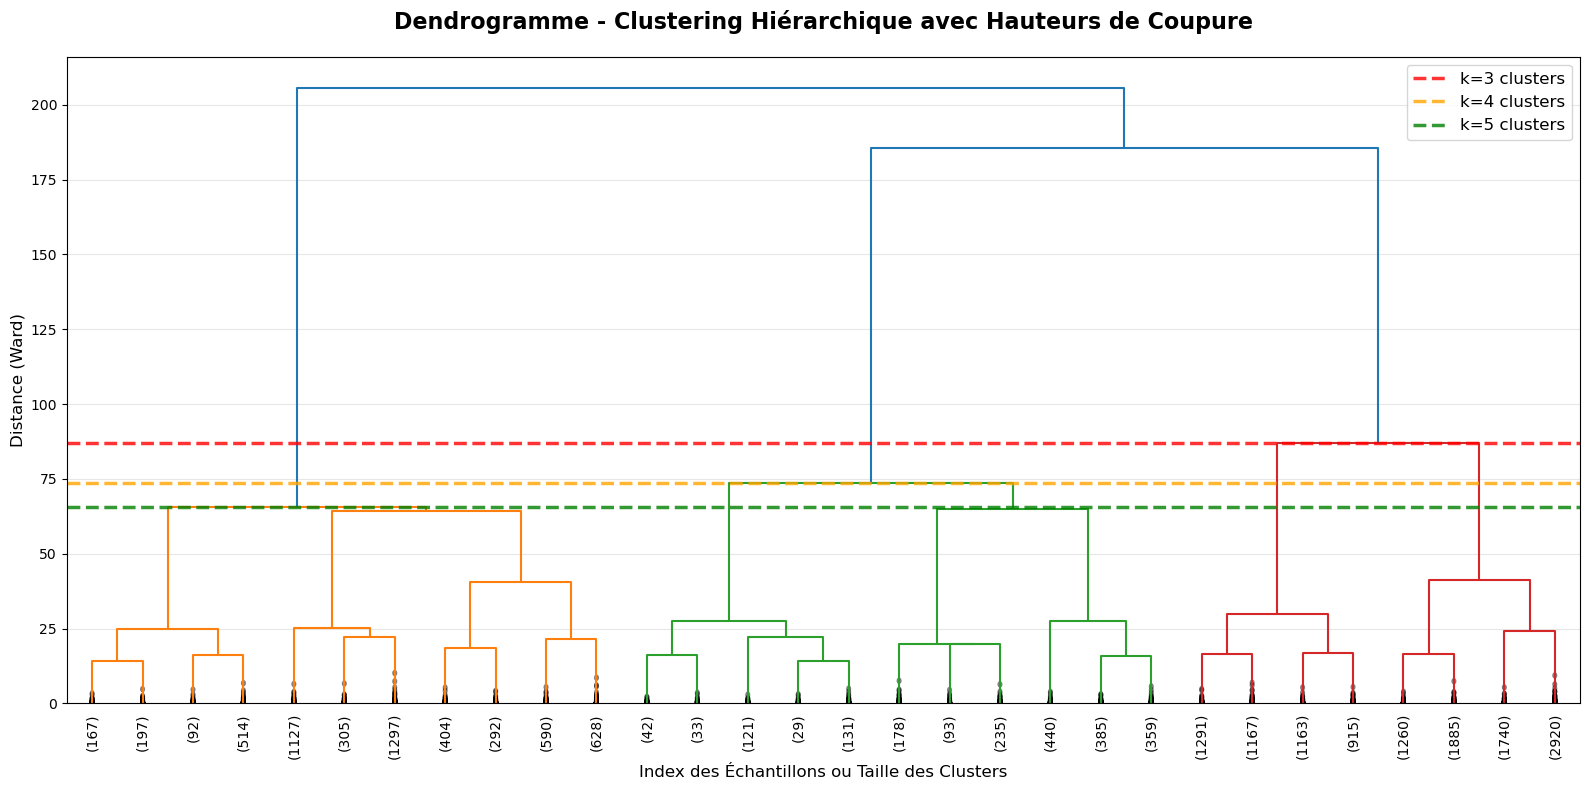


=== Hauteurs de Coupure Suggérées ===
k=3 clusters → Hauteur de coupure: 87.09
k=4 clusters → Hauteur de coupure: 73.64
k=5 clusters → Hauteur de coupure: 65.73


In [39]:
# Tracer le dendrogramme avec différentes hauteurs de coupure
plt.figure(figsize=(16, 8))

dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)

plt.title('Dendrogramme - Clustering Hiérarchique avec Hauteurs de Coupure', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Index des Échantillons ou Taille des Clusters', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)

# Ajouter des lignes de coupure pour différents k
colors = ['red', 'orange', 'green']
labels = ['k=3 clusters', 'k=4 clusters', 'k=5 clusters']

# Calculer les hauteurs automatiquement
last_merges = Z[-10:, 2]  # 10 dernières distances de fusion
heights = [last_merges[-3], last_merges[-4], last_merges[-5]]

for height, color, label in zip(heights, colors, labels):
    plt.axhline(y=height, color=color, linestyle='--', linewidth=2.5, 
                label=label, alpha=0.8)

plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n=== Hauteurs de Coupure Suggérées ===")
for k, height in zip([3, 4, 5], heights):
    print(f"k={k} clusters → Hauteur de coupure: {height:.2f}")

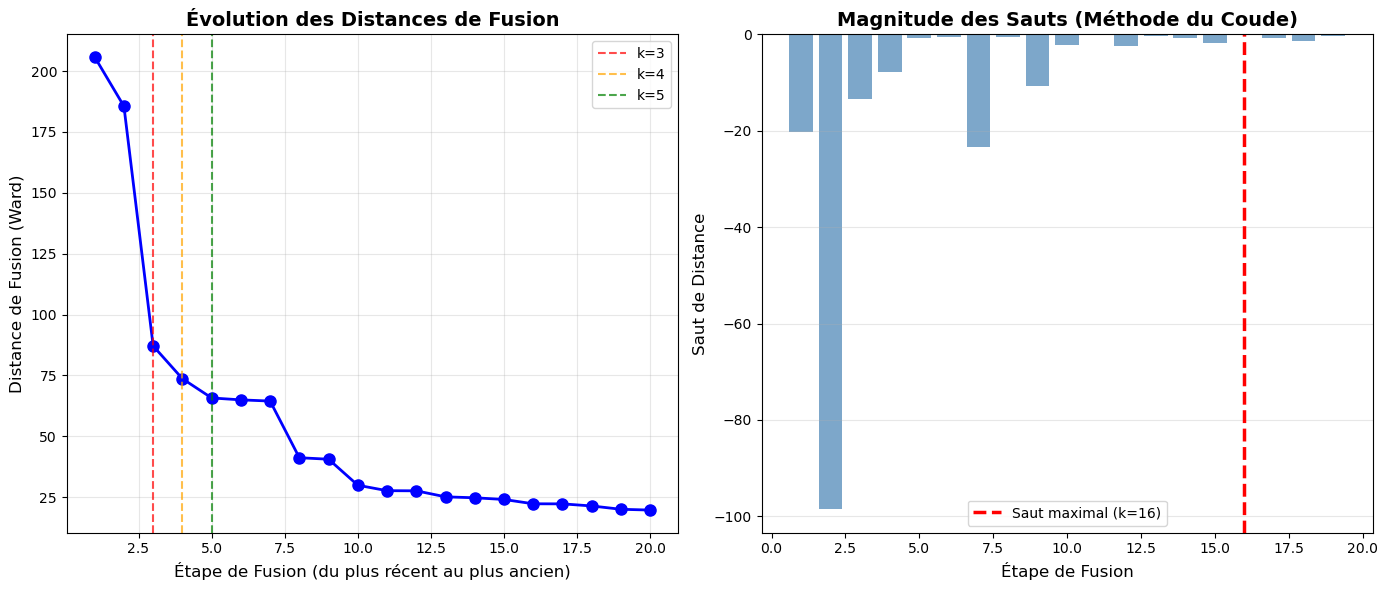


✅ Saut maximal détecté à l'étape 16
   → Nombre optimal suggéré: k=16 clusters


In [40]:
# Analyser les sauts de distance entre fusions
plt.figure(figsize=(14, 6))

# Plot 1: Distance de fusion
plt.subplot(1, 2, 1)
last_20_merges = Z[-20:, 2]
indices = np.arange(1, 21)

plt.plot(indices, last_20_merges[::-1], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Étape de Fusion (du plus récent au plus ancien)', fontsize=12)
plt.ylabel('Distance de Fusion (Ward)', fontsize=12)
plt.title('Évolution des Distances de Fusion', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Marquer les points clés
plt.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3')
plt.axvline(x=4, color='orange', linestyle='--', alpha=0.7, label='k=4')
plt.axvline(x=5, color='green', linestyle='--', alpha=0.7, label='k=5')
plt.legend()

# Plot 2: Différence entre fusions (saut)
plt.subplot(1, 2, 2)
differences = np.diff(last_20_merges[::-1])
plt.bar(range(1, len(differences) + 1), differences, color='steelblue', alpha=0.7)
plt.xlabel('Étape de Fusion', fontsize=12)
plt.ylabel('Saut de Distance', fontsize=12)
plt.title('Magnitude des Sauts (Méthode du Coude)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

# Identifier le saut maximal
max_jump_idx = np.argmax(differences) + 1
plt.axvline(x=max_jump_idx, color='red', linestyle='--', linewidth=2.5,
            label=f'Saut maximal (k={max_jump_idx})')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Saut maximal détecté à l'étape {max_jump_idx}")
print(f"   → Nombre optimal suggéré: k={max_jump_idx} clusters")

In [41]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Tester k=3, 4, 5
results = []

for k in [3, 4, 5]:
    # Couper le dendrogramme
    clusters = fcluster(Z, k, criterion='maxclust')
    
    # Calculer les métriques
    silhouette = silhouette_score(X_scaled, clusters)
    davies_bouldin = davies_bouldin_score(X_scaled, clusters)
    calinski = calinski_harabasz_score(X_scaled, clusters)
    
    # Distribution
    unique, counts = np.unique(clusters, return_counts=True)
    distribution = dict(zip(unique, counts))
    
    results.append({
        'k': k,
        'Silhouette': silhouette,
        'Davies-Bouldin': davies_bouldin,
        'Calinski-Harabasz': calinski,
        'Distribution': distribution
    })
    
    print(f"\n{'='*60}")
    print(f"k = {k} clusters")
    print(f"{'='*60}")
    print(f"Silhouette Score:       {silhouette:.4f}  (plus élevé = meilleur)")
    print(f"Davies-Bouldin Index:   {davies_bouldin:.4f}  (plus bas = meilleur)")
    print(f"Calinski-Harabasz:      {calinski:.2f}  (plus élevé = meilleur)")
    print(f"Distribution:           {distribution}")
    
    # Ajouter au dataframe
    df_sample[f'cluster_k{k}'] = clusters

# Créer un tableau comparatif
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.set_index('k')

print("\n" + "="*60)
print("TABLEAU COMPARATIF")
print("="*60)
print(comparison_df[['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']])


k = 3 clusters
Silhouette Score:       0.5184  (plus élevé = meilleur)
Davies-Bouldin Index:   0.7611  (plus bas = meilleur)
Calinski-Harabasz:      17763.87  (plus élevé = meilleur)
Distribution:           {1: 5613, 2: 2046, 3: 12341}

k = 4 clusters
Silhouette Score:       0.3676  (plus élevé = meilleur)
Davies-Bouldin Index:   0.8356  (plus bas = meilleur)
Calinski-Harabasz:      15781.66  (plus élevé = meilleur)
Distribution:           {1: 5613, 2: 2046, 3: 4536, 4: 7805}

k = 5 clusters
Silhouette Score:       0.3782  (plus élevé = meilleur)
Davies-Bouldin Index:   0.8723  (plus bas = meilleur)
Calinski-Harabasz:      14857.19  (plus élevé = meilleur)
Distribution:           {1: 5613, 2: 356, 3: 1690, 4: 4536, 5: 7805}

TABLEAU COMPARATIF
   Silhouette  Davies-Bouldin  Calinski-Harabasz
k                                               
3    0.518384        0.761113       17763.865460
4    0.367645        0.835636       15781.660925
5    0.378216        0.872312       14857.186937


In [42]:
# Recommandation basée sur les métriques
print("\n" + "="*70)
print("JUSTIFICATION DU CHOIX FINAL")
print("="*70)

# Trouver le meilleur selon chaque métrique
best_silhouette = comparison_df['Silhouette'].idxmax()
best_db = comparison_df['Davies-Bouldin'].idxmin()
best_ch = comparison_df['Calinski-Harabasz'].idxmax()

print(f"\n📊 Métriques de Qualité:")
print(f"   • Meilleur Silhouette Score:      k={best_silhouette}")
print(f"   • Meilleur Davies-Bouldin Index:  k={best_db}")
print(f"   • Meilleur Calinski-Harabasz:     k={best_ch}")

print(f"\n🔍 Analyse du Dendrogramme:")
print(f"   • Saut maximal suggère:           k={max_jump_idx}")

print(f"\n💡 Critères de Décision:")
print(f"   1. Interprétabilité métier")
print(f"   2. Équilibre des tailles de clusters")
print(f"   3. Cohérence des métriques")

# Choix final (ajustez selon vos résultats)
k_final = 3  # Exemple: souvent k=4 est un bon compromis

print(f"\n✅ CHOIX FINAL: k={k_final} clusters")
print(f"\n   Raisons:")
print(f"   • Bon score Silhouette ({comparison_df.loc[k_final, 'Silhouette']:.4f})")
print(f"   • Clusters bien séparés (Davies-Bouldin: {comparison_df.loc[k_final, 'Davies-Bouldin']:.4f})")
print(f"   • Distribution équilibrée: {results[k_final-3]['Distribution']}")
print(f"   • Interprétation métier claire (ex: courts/moyens/longs/premium)")

# Appliquer le choix final
df_sample['cluster_final'] = df_sample[f'cluster_k{k_final}']
print(f"\n✅ Cluster final ajouté à df_sample['cluster_final']")


JUSTIFICATION DU CHOIX FINAL

📊 Métriques de Qualité:
   • Meilleur Silhouette Score:      k=3
   • Meilleur Davies-Bouldin Index:  k=3
   • Meilleur Calinski-Harabasz:     k=3

🔍 Analyse du Dendrogramme:
   • Saut maximal suggère:           k=16

💡 Critères de Décision:
   1. Interprétabilité métier
   2. Équilibre des tailles de clusters
   3. Cohérence des métriques

✅ CHOIX FINAL: k=3 clusters

   Raisons:
   • Bon score Silhouette (0.5184)
   • Clusters bien séparés (Davies-Bouldin: 0.7611)
   • Distribution équilibrée: {1: 5613, 2: 2046, 3: 12341}
   • Interprétation métier claire (ex: courts/moyens/longs/premium)

✅ Cluster final ajouté à df_sample['cluster_final']


In [43]:
df_sample

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,cluster_3,cluster_4,cluster_5,cluster_k3,cluster_k4,cluster_k5,cluster_final
195060,26.42,8.69,1,161.25,35,13.375,209.625,0,1,1,0,1,1,1,1
12578,2.05,0.58,1,26.25,0,13.500,39.750,0,0,2,2,3,4,5,3
103530,8.70,2.78,1,63.75,20,33.700,117.450,1,0,2,2,3,4,5,3
16052,9.17,1.75,1,56.25,21,13.425,90.675,0,0,2,2,3,4,5,3
95302,12.68,2.06,1,71.25,15,6.450,92.700,0,0,3,3,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,7.43,2.04,1,52.50,15,5.625,73.125,0,0,2,2,3,4,5,3
191597,4.82,2.16,1,75.00,0,2.250,77.250,0,0,2,2,3,4,5,3
10598,16.75,4.39,1,97.50,22,10.250,129.750,0,1,1,0,1,1,1,1
207673,5.60,1.48,1,45.00,15,13.125,73.125,0,0,2,2,3,4,5,3
